# Support Vector Machine

Support vector machine is a very powerful supervised machine learning algorithms and can be used in both classification and regression. It classify the data points by creatig an hyperplane in N-dimension. The vectors which define hyperplane are called support vectors. 

In SVM, we maximizes the distance between the hyperplane and data points. Loss function used to do so is hinge loss. 

![alt text](https://miro.medium.com/max/2608/1*AndL5FYso8ad7LSrie8zoA.png)

We also add regularizatio parameter in loss function to take care of overfitting. 

SVM can also be used to classify data that do not follow linear classification. When dataset in not seperable in the given dimension, we map the datapoints to a higher dimensions. Adding another dimension can be computationally expensive, so we transform the current space to higher dimension space. These transformation are called kernels. Popular kernels are Gaussian, polynomial, Radial Bias Function, etc. 

Kernels are basically simirality function. Kernel function return the inner product between two points in a suitable feature space. 

![alt text](https://www.researchgate.net/profile/Jui-Sheng_Chou/publication/239386696/figure/tbl2/AS:667912230674445@1536254093339/SVM-Kernel-Function-Types.png)

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split

In [21]:
plt.style.use('ggplot')

**Reading data from csv file**

In [22]:
df=pd.read_csv('/content/drive/My Drive/Colab Notebooks/ML Algorithms/DataSets/breast-cancer-wisconsin.data')
df.replace('?', -99999, inplace=True)
df.drop(['id'], 1, inplace=True)

**Getting test and train data set from dataframe**

In [23]:
x=np.array(df.drop([' class'], 1))
y=np.array(df[' class'])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [24]:
clf=svm.SVC()
clf.fit(x_train, y_train)

acc=clf.score(x_test, y_test)
print(acc)

0.6785714285714286


# SVM from scratch

In [25]:
class SupportVectorMachine:
  def __init__(self, visualization=True):
    self.visualization=visualization
    self.colors={1:'r', -1:'b'}
    if self.visualization:
      self.fig=plt.figure(figsize=(18,8))
      self.ax=self.fig.add_subplot(1,1,1)
  
  def fit(self, data):
    self.data=data
    opt_dict={}

    transforms=[[1,1],[-1,1],[-1,-1],[1,-1]]
    all_data=[]
    for yi in self.data:
      for featureset in self.data[yi]:
        for feature in featureset:
          all_data.append(feature)
    

    self.max_feature=max(all_data)
    self.min_feature=min(all_data)
    all_data=None
    
    steps=[self.max_feature*0.1,
           self.max_feature*0.01,
           self.max_feature*0.001]
    
    b_range_multiple=5
    b_multiple=5
    latest_optimum=self.max_feature*10

    for step in steps:
      w=np.array([latest_optimum, latest_optimum])
      optimized=False

      while optimized is False:
        for b in np.arange(-1*(self.max_feature*b_range_multiple), self.max_feature*b_range_multiple, b_multiple):
          for transformation in transforms:
            w_t=w*transformation
            found=True
            for yi in self.data:
              for xi in self.data[yi]:
                if not yi*(np.dot(w_t,xi)+b)>=1:
                  found=False
            
            if found:
              opt_dict[np.linalg.norm(w_t)]=[w_t, b]
        
        if w[0]<0:
          optimized=True
          print('Optimized a step')
        else:
          w=w-step
    
      norms=sorted([n for n in opt_dict])
      opt_choice=opt_dict[norms[0]]
      self.w=opt_choice[0]
      self.b=opt_choice[1]
      latest_optimum=opt_choice[0][0]+step*2


  def predict(self, features):
    classification=np.sign(np.dot(np.array(features), self.w)+self.b)

    if classification!=0 and self.visualization:
      self.ax.scatter(features[0], features[1], s=200, marker="*", color=self.colors[classification])
    else:
      print('featureset ', features, 'is on decision boundary')

    return classification
  
  def visualize(self):
        [[self.ax.scatter(x[0],x[1],s=100,color=self.colors[i]) for x in data_dict[i]] for i in data_dict]

        def hyperplane(x,w,b,v):
            return (-w[0]*x-b+v) / w[1]

        datarange = (self.min_feature*0.9,self.max_feature*1.1)
        hyp_x_min = datarange[0]
        hyp_x_max = datarange[1]

        psv1 = hyperplane(hyp_x_min, self.w, self.b, 1)
        psv2 = hyperplane(hyp_x_max, self.w, self.b, 1)
        self.ax.plot([hyp_x_min,hyp_x_max],[psv1,psv2], 'k')

        nsv1 = hyperplane(hyp_x_min, self.w, self.b, -1)
        nsv2 = hyperplane(hyp_x_max, self.w, self.b, -1)
        self.ax.plot([hyp_x_min,hyp_x_max],[nsv1,nsv2], 'k')

        db1 = hyperplane(hyp_x_min, self.w, self.b, 0)
        db2 = hyperplane(hyp_x_max, self.w, self.b, 0)
        self.ax.plot([hyp_x_min,hyp_x_max],[db1,db2], 'y--')

        plt.show()

Optimized a step
Optimized a step
Optimized a step
featureset  [5, 5] is on decision boundary


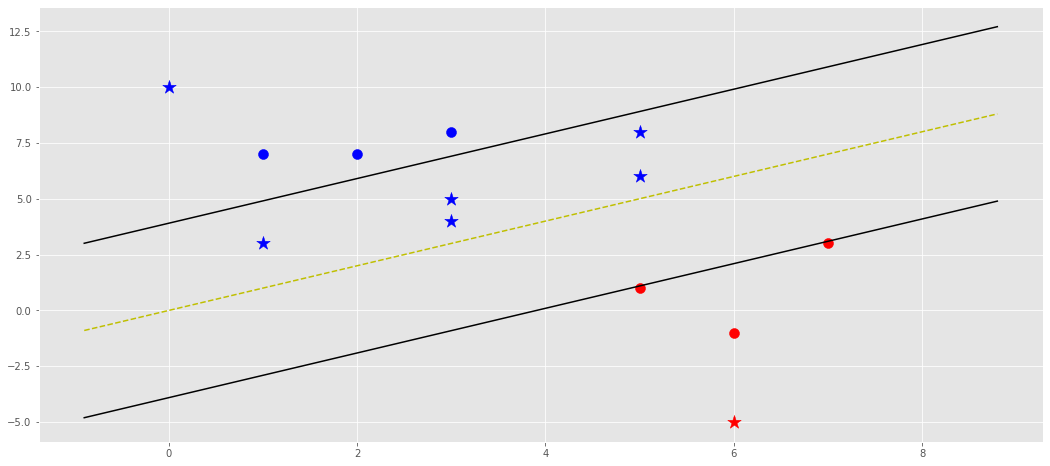

In [26]:
data_dict={
    -1:np.array([[1,7],
                [2,7],
                [3,8]]),
     1:np.array([[5,1],
                 [6,-1],
                 [7,3]])
           
}

svm_from_scratch=SupportVectorMachine()
svm_from_scratch.fit(data=data_dict)

predict_us = [[0,10],
              [1,3],
              [3,4],
              [3,5],
              [5,5],
              [5,6],
              [6,-5],
              [5,8]]

for p in predict_us:
    svm_from_scratch.predict(p)

svm_from_scratch.visualize()